<a href="https://colab.research.google.com/github/NaniDaChaman/Sparsh-coding-challenge-FA24/blob/main/Political_dataset_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Git Config and startup

In [2]:
!git clone https://github.com/NaniDaChaman/Sparsh-coding-challenge-FA24.git

Cloning into 'Sparsh-coding-challenge-FA24'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 205 (delta 10), reused 1 (delta 0), pack-reused 182 (from 1)
Receiving objects: 100% (205/205), 7.49 MiB | 16.82 MiB/s, done.
Resolving deltas: 100% (96/96), done.


In [3]:
!git config --global user.name "NaniDaChaman"
!git config --global user.email "nani00sp@gmail.com"

In [4]:
donations = pd.read_csv('/content/Sparsh-coding-challenge-FA24/Submissions/donations_cleaned.csv')

In [5]:
donations.head()

,Unnamed: 0,committee_id,committee_name,report_year,report_type,image_number,line_number,transaction_id,file_number,entity_type,...,back_reference_schedule_name,filing_form,link_id,is_individual,memo_text,two_year_transaction_period,schedule_type,sub_id,pdf_url,line_number_label
0,0.0,C00725820,THE LINCOLN PROJECT,2021.0,30R,202102049425013615,11AI,17380975,1498464,IND,...,MISSING,F3X,4.020520e+18,t,MISSING,2022.0,SA,4.020620e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20210...,Contributions From Individuals/Persons Other T...
1,1.0,C00375360,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),2023.0,M2,202302179578656047,11AI,49E5B8A5D808EADECD4E,1689425,IND,...,MISSING,F3X,4.021720e+18,t,MISSING,2024.0,SA,4.021720e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
2,2.0,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023.0,M9,202309199597104077,11AI,4307946B72352EE6EE47,1725806,IND,...,MISSING,F3X,4.091920e+18,t,MISSING,2024.0,SA,4.091920e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
3,3.0,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023.0,M8,202308189596617015,11AI,454595293EFB39BAB98F,1722589,IND,...,MISSING,F3X,4.081820e+18,t,MISSING,2024.0,SA,4.081820e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20230...,Contributions From Individuals/Persons Other T...
4,4.0,C00734012,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,2023.0,M12,202312139599459666,11AI,4CD4BCE1C0941D2B0D98,1738535,IND,...,MISSING,F3X,4.121320e+18,t,MISSING,2024.0,SA,4.121420e+18,https://docquery.fec.gov/cgi-bin/fecimg/?20231...,Contributions From Individuals/Persons Other T...


In [6]:
donations['contributor_zip']

,contributor_zip
0,37215.0
1,37027.0
2,27104.0
3,27104.0
4,27104.0
...,...
60073,90065.0
60074,37209.0
60075,37072.0
60076,37027.0


## Removing Columns we don't need

**I've choosen these values as I think this would intuitively make more sense to corellate with a induviduals political belief**

In [7]:
donations_processed = donations.loc[1:,["committee_name","contributor_zip","contributor_employer","contributor_occupation","election_type","fec_election_type_desc","report_year","contribution_receipt_amount"]]

In [9]:
donations_processed.head(20)

,committee_name,contributor_zip,contributor_employer,contributor_occupation,election_type,fec_election_type_desc,report_year,contribution_receipt_amount
1,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),37027.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,ELECTROPHYSIOLOGY,P,PRIMARY,2023.0,416.67
2,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
3,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
4,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
5,ACTBLUE,37221.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PROGRAM MANAGER,NaN,NaN,2023.0,3.00
6,MISSING,NaN,NaN,NaN,NaN,NaN,2020.0,NaN
7,THE LINCOLN PROJECT,37204.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PHYSICIAN,P,PRIMARY,2023.0,20.22
8,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),37027.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,ELECTROPHYSIOLOGY,P,PRIMARY,2023.0,416.67
9,DCCC,37221.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,MUSICIAN,P,PRIMARY,2023.0,50.00
10,THE LINCOLN PROJECT,37204.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PHYSICIAN,P,PRIMARY,2023.0,20.22


In [10]:
donations_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60077 entries, 1 to 60077
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   committee_name               60077 non-null  object 
 1   contributor_zip              39266 non-null  float64
 2   contributor_employer         39266 non-null  object 
 3   contributor_occupation       39266 non-null  object 
 4   election_type                18455 non-null  object 
 5   fec_election_type_desc       18455 non-null  object 
 6   report_year                  60077 non-null  float64
 7   contribution_receipt_amount  39266 non-null  float64
dtypes: float64(3), object(5)
memory usage: 3.7+ MB


## Filling Missing Values again

In [11]:
donations_processed['election_type']=donations_processed['election_type'].fillna('Missing')
donations_processed['fec_election_type_desc'] = donations_processed['fec_election_type_desc'].fillna('Missing')
donations_processed['contributor_employer'] = donations_processed['contributor_employer'].fillna('Missing')
donations_processed['contributor_occupation'] = donations_processed['contributor_occupation'].fillna('Missing')
donations_processed['contribution_receipt_amount'] = donations_processed['contribution_receipt_amount'].fillna(donations_processed['contribution_receipt_amount'].median())
donations_processed['contributor_zip'] = donations_processed['contributor_zip'].fillna(donations_processed['contributor_zip'].median())

In [12]:
donations_processed.head(20)

,committee_name,contributor_zip,contributor_employer,contributor_occupation,election_type,fec_election_type_desc,report_year,contribution_receipt_amount
1,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),37027.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,ELECTROPHYSIOLOGY,P,PRIMARY,2023.0,416.67
2,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
3,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
4,ASCO ASSOCIATION POLITICAL ACTION COMMITTEE (A...,27104.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,RADIATION ONCOLOGIST,P,PRIMARY,2023.0,84.00
5,ACTBLUE,37221.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PROGRAM MANAGER,Missing,Missing,2023.0,3.00
6,MISSING,37209.0,Missing,Missing,Missing,Missing,2020.0,16.00
7,THE LINCOLN PROJECT,37204.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PHYSICIAN,P,PRIMARY,2023.0,20.22
8,AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC),37027.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,ELECTROPHYSIOLOGY,P,PRIMARY,2023.0,416.67
9,DCCC,37221.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,MUSICIAN,P,PRIMARY,2023.0,50.00
10,THE LINCOLN PROJECT,37204.0,VANDERBILT UNIVERSITY MEDICAL SCHOOL,PHYSICIAN,P,PRIMARY,2023.0,20.22


## Encoding Text into Numbers

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder_decoder={}
for col in donations_processed.columns:
    if donations_processed[col].dtype == 'object':
        encoder_decoder[col] = LabelEncoder()
        donations_processed[col] = encoder_decoder[col].fit_transform(donations_processed[col])

In [14]:
encoder_decoder['committee_name'].classes_

array(['314 ACTION FUND', 'AB PAC', 'ACTBLUE', 'ADAM FOR COLORADO',
       'ADAM HOLLIER FOR CONGRESS', 'AFAEC PAC', 'AL TN VICTORY FUND',
       'ALEXANDRIA OCASIO-CORTEZ FOR CONGRESS', 'ALSOBROOKS FOR SENATE',
       'AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION POLITICAL ACTION COMMITTEE (SKINPAC)',
       'AMERICAN ACADEMY OF NEUROLOGY BRAINPAC',
       'AMERICAN ASSOCIATION OF NURSE ANESTHETISTS SEPARATE SEGREGATED FUND (CRNA-PAC)',
       'AMERICAN COLLEGE OF CARDIOLOGY PAC (HEARTPAC)',
       'AMERICAN COLLEGE OF NURSE-MIDWIVES MIDWIVES-PAC',
       'AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC',
       'AMERICAN COLLEGE OF RHEUMATOLOGY (RHEUMPAC)',
       'AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC',
       'AMERICAN ETHIOPIAN PUBLIC AFFAIRS COMMITTEE',
       'AMERICAN ISRAEL PUBLIC AFFAIRS COMMITTEE POLITICAL ACTION COMMITTEE',
       'AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION COMMITTEE',
       'AMERICAN SOCIETY FOR METABOLIC AND BARIATRIC SURGERY POLITICA

In [15]:
donations_processed.head(20)

,committee_name,contributor_zip,contributor_employer,contributor_occupation,election_type,fec_election_type_desc,report_year,contribution_receipt_amount
1,12,37027.0,15,340,12,4,2023.0,416.67
2,31,27104.0,15,806,12,4,2023.0,84.00
3,31,27104.0,15,806,12,4,2023.0,84.00
4,31,27104.0,15,806,12,4,2023.0,84.00
5,2,37221.0,15,776,9,3,2023.0,3.00
6,208,37209.0,1,612,9,3,2020.0,16.00
7,297,37204.0,15,695,12,4,2023.0,20.22
8,12,37027.0,15,340,12,4,2023.0,416.67
9,80,37221.0,15,609,12,4,2023.0,50.00
10,297,37204.0,15,695,12,4,2023.0,20.22


## PCA to visualise our data better

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [17]:
#standardising our data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(donations_processed)
scaled_data

array([[-0.81158162, -0.11064328,  0.71872747, ...,  1.72999695,
         1.78768973,  0.68327236],
       [-0.63353812, -1.58796508,  0.71872747, ...,  1.72999695,
         1.78768973,  0.07399976],
       [-0.63353812, -1.58796508,  0.71872747, ...,  1.72999695,
         1.78768973,  0.07399976],
       ...,
       [-0.68976238, -0.10394374,  0.71872747, ..., -2.78797909,
        -0.56650254, -0.03405653],
       [ 0.35975716, -0.11064328,  0.71872747, ...,  1.72999695,
        -0.56650254,  1.75161935],
       [ 0.99696545, -0.0841429 ,  0.71872747, ...,  1.72999695,
        -0.56650254,  8.47920356]])

In [18]:
#pca with 3 components
pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(60077, 3)

In [19]:
pca.components_#checking our components

array([[ 0.53692962, -0.05106581, -0.52470985, -0.06774166,  0.39439058,
         0.46511798, -0.23938361,  0.00251509],
       [-0.28497423,  0.03583063,  0.37894937,  0.04871033,  0.57727771,
         0.49958895,  0.43109056,  0.05341141],
       [ 0.02016456,  0.72268606, -0.04081452,  0.6380208 ,  0.01707168,
         0.03141735, -0.1133064 , -0.2333775 ]])

Text(0, 0.5, 'pc3')

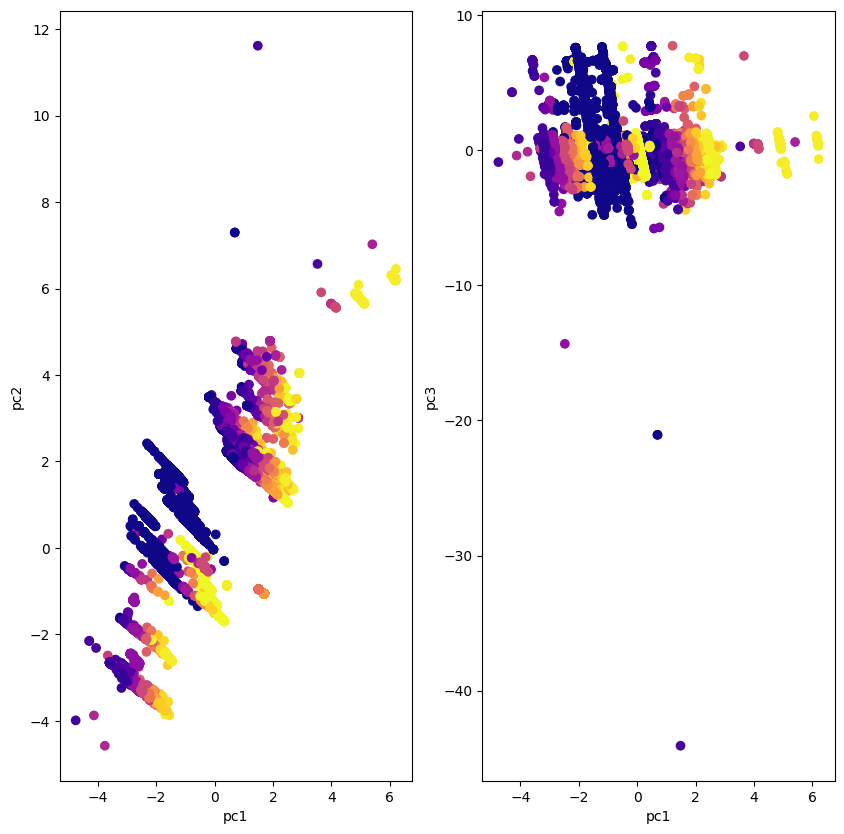

In [20]:
# visulising our daya
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,10))
ax1.scatter(x_pca[:,0],x_pca[:,1],c=donations_processed['committee_name'],cmap='plasma')
ax1.set_xlabel('pc1')
ax1.set_ylabel('pc2')
ax2.scatter(x_pca[:,0],x_pca[:,2],c=donations_processed['committee_name'],cmap='plasma')
ax2.set_xlabel('pc1')
ax2.set_ylabel('pc3')

**There are a lot of categories that we have and we can say that with respect to our 2nd component some of the are distinguished but a lot of them are not,
The darker components always lie on the left for both plots**

Text(0.5, 0, 'PC3')

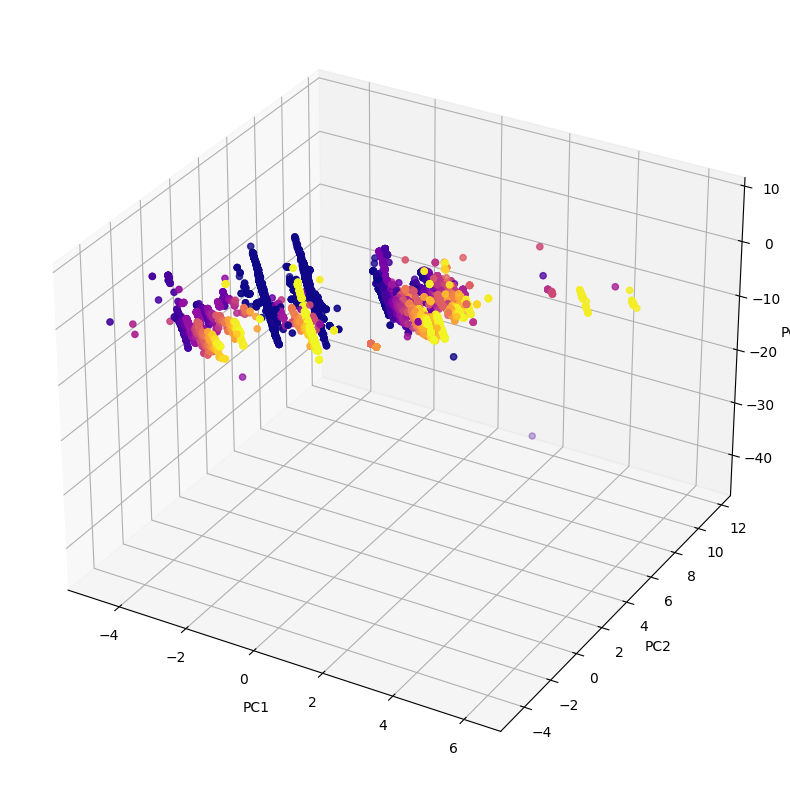

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2], c=donations_processed['committee_name'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

**The brighter spots go more away from the origin and the darker spots are closer to the origin**

## Training KNN

**As shown by our PCA analysis : KNNs would work well on our data as points that are like tend to be physically closer to each other**

In [22]:
donations_processed.head()

,committee_name,contributor_zip,contributor_employer,contributor_occupation,election_type,fec_election_type_desc,report_year,contribution_receipt_amount
1,12,37027.0,15,340,12,4,2023.0,416.67
2,31,27104.0,15,806,12,4,2023.0,84.00
3,31,27104.0,15,806,12,4,2023.0,84.00
4,31,27104.0,15,806,12,4,2023.0,84.00
5,2,37221.0,15,776,9,3,2023.0,3.00


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [29]:
#train test split
y = donations_processed['committee_name'].to_numpy()
X = donations_processed.iloc[0:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=0)

In [32]:
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

In [33]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.9158586825350589

## Saving our Work

In [ ]:
donations_processed.to_csv('/content/Sparsh-coding-challenge-FA24/Submissions/donations_processed.csv')
with open('/content/Sparsh-coding-challenge-FA24/Submissions/encoder_decoder.pickle', 'wb') as handle:
    pickle.dump(encoder_decoder, handle, protocol=pickle.HIGHEST_PROTOCOL)

# You need to download it manually and add it to github yourself for the next notebook
## Can't leak my personal access token